In [1]:
import os
import glob

import numpy as np
import pandas as pd

import xarray as xr
import geopandas as gpd

import clima_anom as ca

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

In [3]:
dir_base = os.path.join('/','home','arturo','Downloads','2024')

In [4]:
file_list = glob.glob(os.path.join(dir_base,'01','*.nc'))
file_list = sorted(file_list)
file_len = len(file_list)
print(f'Number of files: {file_len}')

Number of files: 2736


In [ ]:
PRE = None
for nn in range(file_len):
    DATA = xr.open_dataset(file_list[nn])
    if PRE is None:
        lat = DATA['x'].data
        lon = DATA['y'].data
        PRE = np.zeros([file_len,len(lat),len(lon)])

    else:
        PRE[nn,:,:] = DATA['rain'].values

In [26]:
lon2d, lat2d = np.meshgrid(lon, lat)

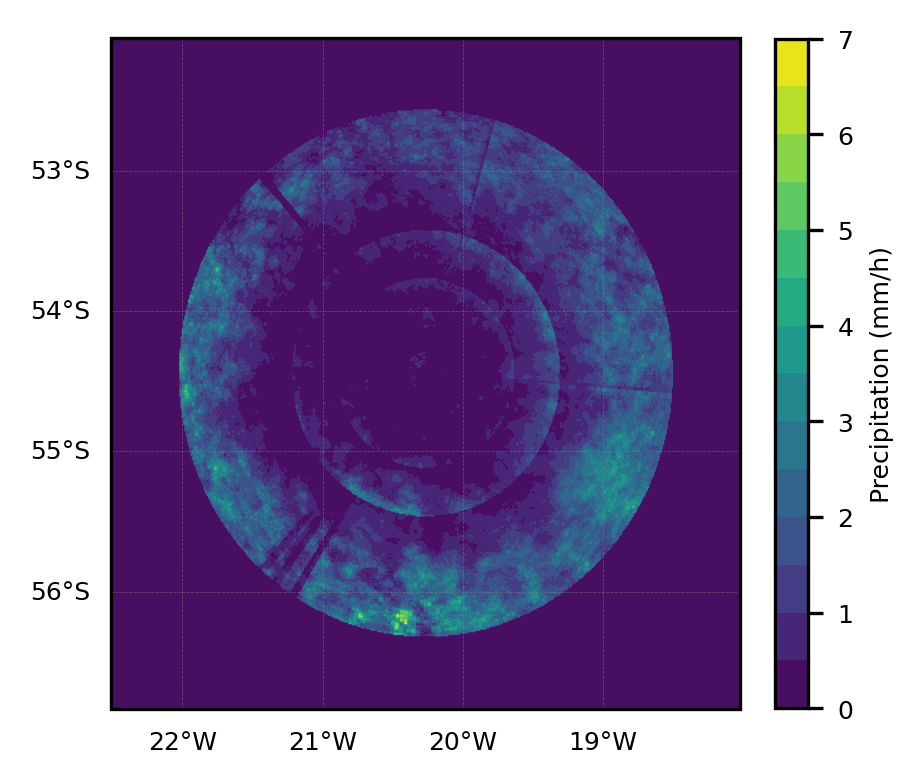

In [34]:
levels = np.arange(0,7.5,0.5)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(3,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.contourf(lon2d, lat2d, np.nanmean(PRE,axis=0), levels=levels)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

cbar = plt.colorbar(a1, orientation='vertical', pad=0.05, fraction=0.048)
cbar.set_label('Precipitation (mm/h)', fontsize=6)
cbar.ax.tick_params(labelsize=6)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)